# Datafolio

Para acceder a los datos que se desean analizar consulte  el siguiente [enlace.](https://datacatalog.worldbank.org/dataset/world-development-indicators) (Data & Resources)

In [1]:
#Importando librerías que tal vez pueda utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Elimina las advertencias

El archivo `WDIData` contiene información de muchos indicadores de los países y regiones del mundo desde el año 1960, es notable que hay una gran cantidad de datos `NaN` ya que no ha sido posible recolectar la misma información en todos los países de igual manera.

El documento `WDISeries` contiene información más detallada del indicador presente en el archivo `WDIData`.

En la tabla `WDICountry` se muestra información relevante de cada uno de los países.

# Ejercicio 1

Haga una lista de todos los temas ('Topic') que hay en el archivo   `WDISeries`, seleccione un sub-tema, por ejemplo, el tema general puede ser 'Environment' y el sub-tema 'Land use' y agregue una columna a `WDISeries` cuyo valor sea el sub-tema elegido, si no es del sub-tema elegido ponga el valor `NaN`.

In [2]:
df1 = pd.read_csv('WDICountry-Series.csv')
df2 = pd.read_csv('WDICountry.csv')
df3 = pd.read_csv('WDIData.csv')
df4 = pd.read_csv('WDIFootNote.csv')
df5 = pd.read_csv('WDISeries-Time.csv')
df6 = pd.read_csv('WDISeries.csv')

In [3]:
df3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378571,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
378572,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.4,NaN,NaN
378573,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.7,NaN,NaN
378574,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.200000,59.300000,59.400000,59.400000,59.500000,59.500000,59.600000,59.6,NaN,NaN


In [4]:
df6

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,VC.IDP.NWDS,Public Sector: Conflict & fragility,"Internally displaced persons, new displacement...",NaN,Internally displaced persons are defined accor...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,The Internal Displacement Monitoring Centre (h...,"Internally displaced persons are ""persons or g...",Although all persons affected by conflict and/...,NaN,NaN,NaN,CC BY-4.0,NaN
1430,VC.IDP.TOCV,Public Sector: Conflict & fragility,"Internally displaced persons, total displaced ...",NaN,Internally displaced persons are defined accor...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,The Internal Displacement Monitoring Centre (h...,"Internally displaced persons are ""persons or g...",Although all persons affected by conflict and/...,NaN,NaN,NaN,CC BY-4.0,NaN
1431,VC.IHR.PSRC.FE.P5,Public Sector: Conflict & fragility,"Intentional homicides, female (per 100,000 fem...",NaN,"Intentional homicides, female are estimates of...",NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,UN Office on Drugs and Crime's International H...,The definitions used to produce data are in li...,"In some regions, organized crime, drug traffic...",NaN,NaN,NaN,CC BY-4.0,NaN
1432,VC.IHR.PSRC.MA.P5,Public Sector: Conflict & fragility,"Intentional homicides, male (per 100,000 male)",NaN,"Intentional homicides, male are estimates of u...",NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,UN Office on Drugs and Crime's International H...,The definitions used to produce data are in li...,"In some regions, organized crime, drug traffic...",NaN,NaN,NaN,CC BY-4.0,NaN


In [5]:
sorted(df6['Topic'].unique())

['Economic Policy & Debt: Balance of payments: Capital & financial account',
 'Economic Policy & Debt: Balance of payments: Current account: Balances',
 'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income',
 'Economic Policy & Debt: Balance of payments: Current account: Transfers',
 'Economic Policy & Debt: Balance of payments: Reserves & other items',
 'Economic Policy & Debt: External debt: Debt outstanding',
 'Economic Policy & Debt: External debt: Debt ratios & other items',
 'Economic Policy & Debt: External debt: Debt service',
 'Economic Policy & Debt: External debt: Net flows',
 'Economic Policy & Debt: National accounts: Adjusted savings & income',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Economic Policy & Debt: National accounts: Growth rates',
 'Economic Policy & Debt: National accounts: Local currency at constant prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: Local currency a

In [6]:
dfe = df6[df6['Topic'] == 'Environment: Density & urbanization']
dfe

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
267,EN.POP.DNST,Environment: Density & urbanization,Population density (people per sq. km of land ...,NaN,Population density is midyear population divid...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,Food and Agriculture Organization and World Ba...,Population density is midyear population divid...,Population estimates are usually based on nati...,NaN,NaN,NaN,CC BY-4.0,NaN
271,EN.POP.SLUM.UR.ZS,Environment: Density & urbanization,Population living in slums (% of urban populat...,NaN,Population living in slums is the proportion o...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,United Nations Human Settlements Programme (UN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,EN.URB.LCTY,Environment: Density & urbanization,Population in largest city,NaN,Population in largest city is the urban popula...,NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"United Nations, World Urbanization Prospects.",Urban population refers to people living in ur...,"A metropolitan area includes the urban area, a...",NaN,NaN,NaN,CC BY-4.0,NaN
273,EN.URB.LCTY.UR.ZS,Environment: Density & urbanization,Population in the largest city (% of urban pop...,NaN,Population in largest city is the percentage o...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,"United Nations, World Urbanization Prospects.",Urban population refers to people living in ur...,"A metropolitan area includes the urban area, a...",NaN,NaN,NaN,CC BY-4.0,NaN
274,EN.URB.MCTY,Environment: Density & urbanization,Population in urban agglomerations of more tha...,NaN,Population in urban agglomerations of more tha...,NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"United Nations, World Urbanization Prospects.",Urban population refers to people living in ur...,"According to the United Nations, an Urban Aggl...",NaN,NaN,NaN,CC BY-4.0,NaN
275,EN.URB.MCTY.TL.ZS,Environment: Density & urbanization,Population in urban agglomerations of more tha...,NaN,Population in urban agglomerations of more tha...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,"United Nations, World Urbanization Prospects.",Urban population refers to people living in ur...,"According to the United Nations, an Urban Aggl...",NaN,NaN,NaN,CC BY-4.0,NaN
1327,SP.RUR.TOTL,Environment: Density & urbanization,Rural population,NaN,Rural population refers to people living in ru...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,World Bank staff estimates based on the United...,Rural population is calculated as the differen...,The rural population is calculated using the u...,NaN,NaN,NaN,CC BY-4.0,NaN
1328,SP.RUR.TOTL.ZG,Environment: Density & urbanization,Rural population growth (annual %),NaN,Rural population refers to people living in ru...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,World Bank staff estimates based on the United...,Rural population is calculated as the differen...,The rural population is calculated using the u...,NaN,NaN,NaN,CC BY-4.0,NaN
1329,SP.RUR.TOTL.ZS,Environment: Density & urbanization,Rural population (% of total population),NaN,Rural population refers to people living in ru...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,World Bank staff estimates based on the United...,Rural population is calculated as the differen...,The rural population is calculated using the u...,NaN,NaN,NaN,CC BY-4.0,NaN
1330,SP.URB.GROW,Environment: Density & urbanization,Urban population growth (annual %),NaN,Urban population refers to people living in ur...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,World Bank staff estimates based on the United...,Urban population refers to people living in ur...,Explosive growth of cities globally signifies ...,NaN,NaN,NaN,CC BY-4.0,NaN


In [7]:
#Selección Tema = 'Environment: Density & urbanization'
#Selección Subtema = 'Urban population' - 'SP.URB.TOTL'
#Selección Subtema = 'Rural population' - 'SP.RUR.TOTL'

In [8]:
#Ajuste de los nombres de las columnas para hacer la consulta
dfz = df3
dfz = dfz.rename(columns={'Country Name':'CountryName', 'Country Code':'CountryCode', 
                          'Indicator Name':'IndicatorName', 'Indicator Code':'IndicatorCode'})
dfz

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378571,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
378572,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.4,NaN,NaN
378573,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.7,NaN,NaN
378574,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.200000,59.300000,59.400000,59.400000,59.500000,59.500000,59.600000,59.6,NaN,NaN


In [9]:
# Creacion de la consulta bajo los indicadores 'SP.RUR.TOTL', 'SP.URB.TOTL'
dfz1 = dfz[dfz.IndicatorCode.isin(['SP.RUR.TOTL', 'SP.URB.TOTL'])]
dfz1

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
1188,Arab World,ARB,Rural population,SP.RUR.TOTL,63400576.0,64431688.0,65477725.0,66521133.0,67557423.0,68572508.0,...,159354716.0,161751073.0,164114145.0,166207258.0,168295267.0,170355303.0,172427227.0,174564024.0,NaN,NaN
1404,Arab World,ARB,Urban population,SP.URB.TOTL,28797177.0,30292822.0,31856717.0,33513046.0,35275337.0,37163923.0,...,212088831.0,217954644.0,223793602.0,229821020.0,235729168.0,241543664.0,247363364.0,253306246.0,NaN,NaN
2622,Caribbean small states,CSS,Rural population,SP.RUR.TOTL,2727266.0,2756404.0,2784594.0,2811076.0,2835017.0,2856304.0,...,3499691.0,3519544.0,3537932.0,3554433.0,3568805.0,3581077.0,3591220.0,3599295.0,NaN,NaN
2838,Caribbean small states,CSS,Urban population,SP.URB.TOTL,1467447.0,1517657.0,1569031.0,1621143.0,1673175.0,1724068.0,...,3572970.0,3603789.0,3635510.0,3667773.0,3700580.0,3733909.0,3767738.0,3802088.0,NaN,NaN
4056,Central Europe and the Baltics,CEB,Rural population,SP.RUR.TOTL,50720764.0,50536773.0,50348488.0,50171639.0,50000758.0,49742764.0,...,39410425.0,39310807.0,39210929.0,39092740.0,38947818.0,38785310.0,38621819.0,38460304.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375678,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,...,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,NaN,NaN
376896,Zambia,ZMB,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,2700787.0,2735975.0,...,8627866.0,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0,NaN,NaN
377112,Zambia,ZMB,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,...,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,NaN,NaN
378330,Zimbabwe,ZWE,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,3713683.0,3817491.0,...,8808909.0,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0,NaN,NaN


# Ejercicio 2
Cree una nueva base de datos que contenga el histórico de todos los sucesos de su sub-tema por países y regiones. Llámela `sub-tema_df`. Trate esta nueva base de datos para que sea más legible y limpie, de ser necesario, la base.

In [10]:
#descripción de datos
dfz1.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,...,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,5.200000e+02,0.0,0.0
mean,5.897638e+07,5.976912e+07,6.082839e+07,6.214671e+07,6.347539e+07,6.483690e+07,6.627039e+07,6.769847e+07,6.915311e+07,7.067992e+07,...,1.440374e+08,1.458702e+08,1.477204e+08,1.495783e+08,1.514514e+08,1.533223e+08,1.551615e+08,1.569792e+08,NaN,NaN
std,2.083175e+08,2.100002e+08,2.129327e+08,2.170358e+08,2.211316e+08,2.257488e+08,2.306905e+08,2.355545e+08,2.405291e+08,2.457569e+08,...,4.595782e+08,4.650365e+08,4.705940e+08,4.762244e+08,4.819577e+08,4.877482e+08,4.934646e+08,4.991294e+08,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,1.645775e+05,1.699552e+05,1.756458e+05,1.805808e+05,1.859848e+05,1.941952e+05,2.023768e+05,2.107878e+05,2.163432e+05,2.305725e+05,...,6.197892e+05,6.248172e+05,6.309102e+05,6.323025e+05,6.374985e+05,6.414032e+05,6.459160e+05,6.498830e+05,NaN,NaN
50%,1.598690e+06,1.653706e+06,1.704136e+06,1.731524e+06,1.809116e+06,1.859465e+06,1.900737e+06,1.945662e+06,1.986415e+06,2.012346e+06,...,4.278425e+06,4.338750e+06,4.381056e+06,4.441240e+06,4.506200e+06,4.558275e+06,4.611798e+06,4.681215e+06,NaN,NaN
75%,1.038705e+07,1.070984e+07,1.104076e+07,1.137737e+07,1.172012e+07,1.199196e+07,1.218905e+07,1.210201e+07,1.224262e+07,1.264027e+07,...,2.821333e+07,2.871734e+07,2.908516e+07,2.927048e+07,2.968717e+07,3.012725e+07,3.073922e+07,3.100485e+07,NaN,NaN
max,2.011913e+09,2.023385e+09,2.044462e+09,2.074713e+09,2.104526e+09,2.140439e+09,2.178883e+09,2.216228e+09,2.254260e+09,2.294523e+09,...,3.722957e+09,3.799325e+09,3.876977e+09,3.955776e+09,4.035640e+09,4.115729e+09,4.195156e+09,4.274338e+09,NaN,NaN


In [11]:
dfz1.info()
#Se encuentran 2 columnas totalmente nulas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1188 to 378546
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    528 non-null    object 
 1   CountryCode    528 non-null    object 
 2   IndicatorName  528 non-null    object 
 3   IndicatorCode  528 non-null    object 
 4   1960           520 non-null    float64
 5   1961           520 non-null    float64
 6   1962           520 non-null    float64
 7   1963           520 non-null    float64
 8   1964           520 non-null    float64
 9   1965           520 non-null    float64
 10  1966           520 non-null    float64
 11  1967           520 non-null    float64
 12  1968           520 non-null    float64
 13  1969           520 non-null    float64
 14  1970           520 non-null    float64
 15  1971           520 non-null    float64
 16  1972           520 non-null    float64
 17  1973           520 non-null    float64
 18  1974

In [12]:
dfz1.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [13]:
#Eliminación de las columnas con datos nulos y asignación de los resultados al nuevo dataframe 
sub_tema_df = dfz1.drop(['2020', 'Unnamed: 65'], axis=1)
sub_tema_df

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1188,Arab World,ARB,Rural population,SP.RUR.TOTL,63400576.0,64431688.0,65477725.0,66521133.0,67557423.0,68572508.0,...,154586981.0,156913797.0,159354716.0,161751073.0,164114145.0,166207258.0,168295267.0,170355303.0,172427227.0,174564024.0
1404,Arab World,ARB,Urban population,SP.URB.TOTL,28797177.0,30292822.0,31856717.0,33513046.0,35275337.0,37163923.0,...,200303061.0,206244906.0,212088831.0,217954644.0,223793602.0,229821020.0,235729168.0,241543664.0,247363364.0,253306246.0
2622,Caribbean small states,CSS,Rural population,SP.RUR.TOTL,2727266.0,2756404.0,2784594.0,2811076.0,2835017.0,2856304.0,...,3456330.0,3479149.0,3499691.0,3519544.0,3537932.0,3554433.0,3568805.0,3581077.0,3591220.0,3599295.0
2838,Caribbean small states,CSS,Urban population,SP.URB.TOTL,1467447.0,1517657.0,1569031.0,1621143.0,1673175.0,1724068.0,...,3516866.0,3543231.0,3572970.0,3603789.0,3635510.0,3667773.0,3700580.0,3733909.0,3767738.0,3802088.0
4056,Central Europe and the Baltics,CEB,Rural population,SP.RUR.TOTL,50720764.0,50536773.0,50348488.0,50171639.0,50000758.0,49742764.0,...,39652932.0,39519532.0,39410425.0,39310807.0,39210929.0,39092740.0,38947818.0,38785310.0,38621819.0,38460304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375678,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,...,7357687.0,7705088.0,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
376896,Zambia,ZMB,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,2700787.0,2735975.0,...,8251349.0,8434810.0,8627866.0,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0
377112,Zambia,ZMB,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,...,5354635.0,5588383.0,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0
378330,Zimbabwe,ZWE,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,3713683.0,3817491.0,...,8482587.0,8637258.0,8808909.0,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0


In [14]:
sub_tema_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 1188 to 378546
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    528 non-null    object 
 1   CountryCode    528 non-null    object 
 2   IndicatorName  528 non-null    object 
 3   IndicatorCode  528 non-null    object 
 4   1960           520 non-null    float64
 5   1961           520 non-null    float64
 6   1962           520 non-null    float64
 7   1963           520 non-null    float64
 8   1964           520 non-null    float64
 9   1965           520 non-null    float64
 10  1966           520 non-null    float64
 11  1967           520 non-null    float64
 12  1968           520 non-null    float64
 13  1969           520 non-null    float64
 14  1970           520 non-null    float64
 15  1971           520 non-null    float64
 16  1972           520 non-null    float64
 17  1973           520 non-null    float64
 18  1974

# Ejercicio 3
Divida la base de datos resultante del ejercicio anterior en dos, `sub-tema_C_df` y `sub-tema_R_df`, la primera tendrá la información por países y la segunda por regiones.

*Ayuda:* Use el archivo `WDICountry`para hacer la separación adecuada, la columna 'Regions' será de gran utilidad.

In [15]:
df2

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
259,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,NaN,Middle East & North Africa,Low income,RY,...,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2017.0,NaN
260,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2016","Expenditure survey/budget survey (ES/BS), 2014/15",NaN,2007,2010.0,2017.0,NaN
261,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data were rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2010,"Demographic and Health Survey, 2018","Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2017.0,NaN


In [16]:
#Creacion de in dataframe con los datos que me interesan de la tabla region
Region = pd.DataFrame(df2['Country Code'])
Region['Region'] = df2['Region']
Region['Latest population census'] = df2['Latest population census']
Region

,Country Code,Region,Latest population census
0,ABW,Latin America & Caribbean,2010
1,AFG,South Asia,1979
2,AGO,Sub-Saharan Africa,2014
3,ALB,Europe & Central Asia,2011
4,AND,Europe & Central Asia,2011. Population data compiled from administra...
...,...,...,...
258,XKX,Europe & Central Asia,2011
259,YEM,Middle East & North Africa,2004
260,ZAF,Sub-Saharan Africa,2011
261,ZMB,Sub-Saharan Africa,2010


In [17]:
sub_tema_df = pd.merge(sub_tema_df, Region, left_on='CountryCode', right_on='Country Code')
sub_tema_df

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,Country Code,Region,Latest population census
0,Arab World,ARB,Rural population,SP.RUR.TOTL,63400576.0,64431688.0,65477725.0,66521133.0,67557423.0,68572508.0,...,161751073.0,164114145.0,166207258.0,168295267.0,170355303.0,172427227.0,174564024.0,ARB,NaN,NaN
1,Arab World,ARB,Urban population,SP.URB.TOTL,28797177.0,30292822.0,31856717.0,33513046.0,35275337.0,37163923.0,...,217954644.0,223793602.0,229821020.0,235729168.0,241543664.0,247363364.0,253306246.0,ARB,NaN,NaN
2,Caribbean small states,CSS,Rural population,SP.RUR.TOTL,2727266.0,2756404.0,2784594.0,2811076.0,2835017.0,2856304.0,...,3519544.0,3537932.0,3554433.0,3568805.0,3581077.0,3591220.0,3599295.0,CSS,NaN,NaN
3,Caribbean small states,CSS,Urban population,SP.URB.TOTL,1467447.0,1517657.0,1569031.0,1621143.0,1673175.0,1724068.0,...,3603789.0,3635510.0,3667773.0,3700580.0,3733909.0,3767738.0,3802088.0,CSS,NaN,NaN
4,Central Europe and the Baltics,CEB,Rural population,SP.RUR.TOTL,50720764.0,50536773.0,50348488.0,50171639.0,50000758.0,49742764.0,...,39310807.0,39210929.0,39092740.0,38947818.0,38785310.0,38621819.0,38460304.0,CEB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,...,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,YEM,Middle East & North Africa,2004
522,Zambia,ZMB,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,2700787.0,2735975.0,...,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0,ZMB,Sub-Saharan Africa,2010
523,Zambia,ZMB,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,...,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,ZMB,Sub-Saharan Africa,2010
524,Zimbabwe,ZWE,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,3713683.0,3817491.0,...,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0,ZWE,Sub-Saharan Africa,2012


In [18]:
#Filtrar los nan y reemplazar por global
sub_tema_df['Region'] = sub_tema_df['Region'].fillna('Global')
sub_tema_df['Region'].unique()

array(['Global', 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [19]:
#Eliminando columna Repetida del merge
sub_tema_df = sub_tema_df.drop(['CountryCode'], axis=1)
sub_tema_df

,CountryName,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,Country Code,Region,Latest population census
0,Arab World,Rural population,SP.RUR.TOTL,63400576.0,64431688.0,65477725.0,66521133.0,67557423.0,68572508.0,69660117.0,...,161751073.0,164114145.0,166207258.0,168295267.0,170355303.0,172427227.0,174564024.0,ARB,Global,NaN
1,Arab World,Urban population,SP.URB.TOTL,28797177.0,30292822.0,31856717.0,33513046.0,35275337.0,37163923.0,39098493.0,...,217954644.0,223793602.0,229821020.0,235729168.0,241543664.0,247363364.0,253306246.0,ARB,Global,NaN
2,Caribbean small states,Rural population,SP.RUR.TOTL,2727266.0,2756404.0,2784594.0,2811076.0,2835017.0,2856304.0,2874015.0,...,3519544.0,3537932.0,3554433.0,3568805.0,3581077.0,3591220.0,3599295.0,CSS,Global,NaN
3,Caribbean small states,Urban population,SP.URB.TOTL,1467447.0,1517657.0,1569031.0,1621143.0,1673175.0,1724068.0,1774342.0,...,3603789.0,3635510.0,3667773.0,3700580.0,3733909.0,3767738.0,3802088.0,CSS,Global,NaN
4,Central Europe and the Baltics,Rural population,SP.RUR.TOTL,50720764.0,50536773.0,50348488.0,50171639.0,50000758.0,49742764.0,49510175.0,...,39310807.0,39210929.0,39092740.0,38947818.0,38785310.0,38621819.0,38460304.0,CEB,Global,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"Yemen, Rep.",Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,666018.0,...,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,YEM,Middle East & North Africa,2004
522,Zambia,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,2700787.0,2735975.0,2769235.0,...,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0,ZMB,Sub-Saharan Africa,2010
523,Zambia,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,912720.0,...,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,ZMB,Sub-Saharan Africa,2010
524,Zimbabwe,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,3713683.0,3817491.0,3922220.0,...,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0,ZWE,Sub-Saharan Africa,2012


In [20]:
sub_tema_df.columns

Index(['CountryName', 'IndicatorName', 'IndicatorCode', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Country Code', 'Region',
       'Latest population census'],
      dtype='object')

In [21]:
#Reorganización de las columnas del dataframe
sub_tema_df = sub_tema_df.reindex(columns=['CountryName','Country Code', 'Region','Latest population census', 
                                           'IndicatorName', 'IndicatorCode', '1960', '1961', '1962',
                                           '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
                                           '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                                           '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                           '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
                                           '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                                           '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                                           '2017', '2018', '2019'])
sub_tema_df

,CountryName,Country Code,Region,Latest population census,IndicatorName,IndicatorCode,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arab World,ARB,Global,NaN,Rural population,SP.RUR.TOTL,63400576.0,64431688.0,65477725.0,66521133.0,...,154586981.0,156913797.0,159354716.0,161751073.0,164114145.0,166207258.0,168295267.0,170355303.0,172427227.0,174564024.0
1,Arab World,ARB,Global,NaN,Urban population,SP.URB.TOTL,28797177.0,30292822.0,31856717.0,33513046.0,...,200303061.0,206244906.0,212088831.0,217954644.0,223793602.0,229821020.0,235729168.0,241543664.0,247363364.0,253306246.0
2,Caribbean small states,CSS,Global,NaN,Rural population,SP.RUR.TOTL,2727266.0,2756404.0,2784594.0,2811076.0,...,3456330.0,3479149.0,3499691.0,3519544.0,3537932.0,3554433.0,3568805.0,3581077.0,3591220.0,3599295.0
3,Caribbean small states,CSS,Global,NaN,Urban population,SP.URB.TOTL,1467447.0,1517657.0,1569031.0,1621143.0,...,3516866.0,3543231.0,3572970.0,3603789.0,3635510.0,3667773.0,3700580.0,3733909.0,3767738.0,3802088.0
4,Central Europe and the Baltics,CEB,Global,NaN,Rural population,SP.RUR.TOTL,50720764.0,50536773.0,50348488.0,50171639.0,...,39652932.0,39519532.0,39410425.0,39310807.0,39210929.0,39092740.0,38947818.0,38785310.0,38621819.0,38460304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"Yemen, Rep.",YEM,Middle East & North Africa,2004,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,...,7357687.0,7705088.0,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
522,Zambia,ZMB,Sub-Saharan Africa,2010,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,...,8251349.0,8434810.0,8627866.0,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0
523,Zambia,ZMB,Sub-Saharan Africa,2010,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,...,5354635.0,5588383.0,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0
524,Zimbabwe,ZWE,Sub-Saharan Africa,2012,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,...,8482587.0,8637258.0,8808909.0,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0


In [22]:
sub_tema_C_df = sub_tema_df[sub_tema_df['Region'] != 'Global']
sub_tema_C_df

,CountryName,Country Code,Region,Latest population census,IndicatorName,IndicatorCode,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
92,Afghanistan,AFG,South Asia,1979,Rural population,SP.RUR.TOTL,8241137.0,8373138.0,8512056.0,8657977.0,...,22257743.0,22904895.0,23632788.0,24404522.0,25165917.0,25877997.0,26530269.0,27131559.0,27695286.0,28244481.0
93,Afghanistan,AFG,South Asia,1979,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,...,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
94,Albania,ALB,Europe & Central Asia,2011,Rural population,SP.RUR.TOTL,1114818.0,1146208.0,1180553.0,1214693.0,...,1393502.0,1358266.0,1324613.0,1291587.0,1258985.0,1226200.0,1195854.0,1167112.0,1137407.0,1106598.0
95,Albania,ALB,Europe & Central Asia,2011,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,...,1519519.0,1546929.0,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
96,Algeria,DZA,Middle East & North Africa,2008,Rural population,SP.RUR.TOTL,7684109.0,7731723.0,7760418.0,7783587.0,...,11678282.0,11645141.0,11620781.0,11603754.0,11591085.0,11581514.0,11573776.0,11567453.0,11558343.0,11542954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"Yemen, Rep.",YEM,Middle East & North Africa,2004,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,...,7357687.0,7705088.0,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0
522,Zambia,ZMB,Sub-Saharan Africa,2010,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,...,8251349.0,8434810.0,8627866.0,8826788.0,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0
523,Zambia,ZMB,Sub-Saharan Africa,2010,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,...,5354635.0,5588383.0,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0
524,Zimbabwe,ZWE,Sub-Saharan Africa,2012,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,...,8482587.0,8637258.0,8808909.0,8990931.0,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0


In [23]:
sub_tema_R_df = sub_tema_df[sub_tema_df['Region'] == 'Global']
sub_tema_R_df

,CountryName,Country Code,Region,Latest population census,IndicatorName,IndicatorCode,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arab World,ARB,Global,NaN,Rural population,SP.RUR.TOTL,6.340058e+07,6.443169e+07,6.547772e+07,6.652113e+07,...,1.545870e+08,1.569138e+08,1.593547e+08,1.617511e+08,1.641141e+08,1.662073e+08,1.682953e+08,1.703553e+08,1.724272e+08,1.745640e+08
1,Arab World,ARB,Global,NaN,Urban population,SP.URB.TOTL,2.879718e+07,3.029282e+07,3.185672e+07,3.351305e+07,...,2.003031e+08,2.062449e+08,2.120888e+08,2.179546e+08,2.237936e+08,2.298210e+08,2.357292e+08,2.415437e+08,2.473634e+08,2.533062e+08
2,Caribbean small states,CSS,Global,NaN,Rural population,SP.RUR.TOTL,2.727266e+06,2.756404e+06,2.784594e+06,2.811076e+06,...,3.456330e+06,3.479149e+06,3.499691e+06,3.519544e+06,3.537932e+06,3.554433e+06,3.568805e+06,3.581077e+06,3.591220e+06,3.599295e+06
3,Caribbean small states,CSS,Global,NaN,Urban population,SP.URB.TOTL,1.467447e+06,1.517657e+06,1.569031e+06,1.621143e+06,...,3.516866e+06,3.543231e+06,3.572970e+06,3.603789e+06,3.635510e+06,3.667773e+06,3.700580e+06,3.733909e+06,3.767738e+06,3.802088e+06
4,Central Europe and the Baltics,CEB,Global,NaN,Rural population,SP.RUR.TOTL,5.072076e+07,5.053677e+07,5.034849e+07,5.017164e+07,...,3.965293e+07,3.951953e+07,3.941042e+07,3.931081e+07,3.921093e+07,3.909274e+07,3.894782e+07,3.878531e+07,3.862182e+07,3.846030e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Sub-Saharan Africa (IDA & IBRD countries),TSS,Global,NaN,Urban population,SP.URB.TOTL,3.338081e+07,3.486327e+07,3.642524e+07,3.809880e+07,...,3.128350e+08,3.261746e+08,3.398998e+08,3.541211e+08,3.688731e+08,3.841581e+08,3.999758e+08,4.163360e+08,4.332379e+08,4.506733e+08
88,Upper middle income,UMC,Global,NaN,Rural population,SP.RUR.TOTL,8.953865e+08,8.905806e+08,8.958739e+08,9.101860e+08,...,1.094833e+09,1.079945e+09,1.065542e+09,1.051136e+09,1.036558e+09,1.021767e+09,1.006874e+09,9.918713e+08,9.763049e+08,9.603401e+08
89,Upper middle income,UMC,Global,NaN,Urban population,SP.URB.TOTL,3.358884e+08,3.472962e+08,3.611453e+08,3.774234e+08,...,1.566518e+09,1.602680e+09,1.639106e+09,1.675962e+09,1.713101e+09,1.750098e+09,1.787188e+09,1.824127e+09,1.859615e+09,1.893713e+09
90,World,WLD,Global,NaN,Rural population,SP.RUR.TOTL,2.011913e+09,2.023385e+09,2.044462e+09,2.074713e+09,...,3.346106e+09,3.353217e+09,3.360960e+09,3.368457e+09,3.375406e+09,3.381378e+09,3.386858e+09,3.391549e+09,3.395036e+09,3.397492e+09


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:
map_data = gpd.read_file('custom.geo.json')
map_data.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."
1,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ..."
2,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,"MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ..."
3,1,Admin-0 country,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,...,Americas,Central America,Latin America & Caribbean,10,10,4,-99,1,CRI.geojson,"POLYGON ((-82.96578 8.22503, -83.50844 8.44693..."
4,1,Admin-0 country,3,Cuba,CUB,0,2,Sovereign country,Cuba,CUB,...,Americas,Caribbean,Latin America & Caribbean,4,4,4,-99,1,CUB.geojson,"POLYGON ((-82.26815 23.18861, -81.40446 23.117..."


<AxesSubplot:title={'center':'Natalidad por Provincias en España, 2018'}, xlabel='Longitud', ylabel='Latitud'>

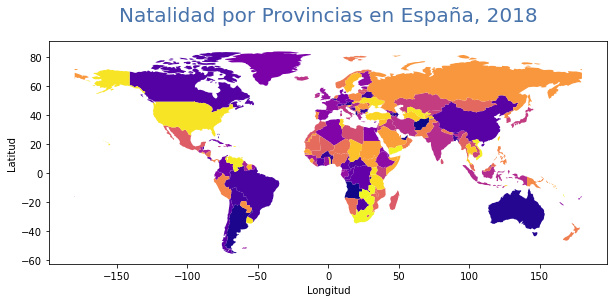

In [26]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_data.plot(column='sov_a3', cmap='plasma', ax=ax, zorder=5)

In [27]:
map_data.columns

Index(['scalerank', 'featurecla', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us',
       'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un', 'subregion',
       'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'filename', 'geometry'],
      dtype='object')

In [28]:
z = pd.DataFrame(map_data['adm0_a3'])
z['filename'] = map_data['filename']
z['Numero'] = 1
z['geometry'] = map_data['geometry']
z

,adm0_a3,filename,Numero,geometry
0,BLZ,BLZ.geojson,1,"POLYGON ((-89.143 17.808, -89.151 17.955, -89...."
1,BHS,BHS.geojson,1,"MULTIPOLYGON (((-77.535 23.760, -77.780 23.710..."
2,CAN,CAN.geojson,1,"MULTIPOLYGON (((-63.664 46.550, -62.939 46.416..."
3,CRI,CRI.geojson,1,"POLYGON ((-82.966 8.225, -83.508 8.447, -83.71..."
4,CUB,CUB.geojson,1,"POLYGON ((-82.268 23.189, -81.404 23.117, -80...."
...,...,...,...,...
170,NZL,NZL.geojson,1,"MULTIPOLYGON (((173.020 -40.919, 173.247 -41.3..."
171,PNG,PNG.geojson,1,"MULTIPOLYGON (((155.880 -6.820, 155.600 -6.920..."
172,RUS,RUS.geojson,1,"MULTIPOLYGON (((143.648 50.748, 144.654 48.976..."
173,SLB,SLB.geojson,1,"MULTIPOLYGON (((162.119 -10.483, 162.399 -10.8..."


In [29]:
from geopandas import GeoDataFrame
z = GeoDataFrame(z)

<AxesSubplot:title={'center':'Natalidad por Provincias en España, 2018'}, xlabel='Longitud', ylabel='Latitud'>

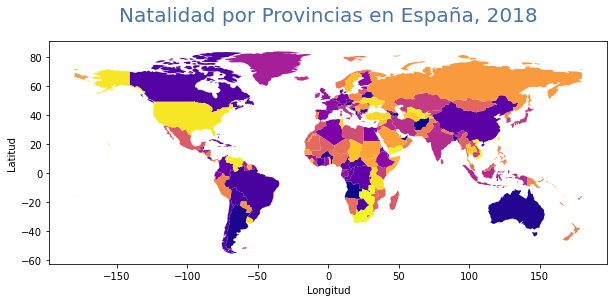

In [30]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
z.plot(column='adm0_a3', cmap='plasma', ax=ax, zorder=5)

In [31]:
zet = pd.merge(sub_tema_C_df, z, left_on='Country Code', right_on='adm0_a3')
zet

,CountryName,Country Code,Region,Latest population census,IndicatorName,IndicatorCode,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,adm0_a3,filename,Numero,geometry
0,Afghanistan,AFG,South Asia,1979,Rural population,SP.RUR.TOTL,8241137.0,8373138.0,8512056.0,8657977.0,...,25165917.0,25877997.0,26530269.0,27131559.0,27695286.0,28244481.0,AFG,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,Afghanistan,AFG,South Asia,1979,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,...,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,AFG,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
2,Albania,ALB,Europe & Central Asia,2011,Rural population,SP.RUR.TOTL,1114818.0,1146208.0,1180553.0,1214693.0,...,1258985.0,1226200.0,1195854.0,1167112.0,1137407.0,1106598.0,ALB,ALB.geojson,1,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
3,Albania,ALB,Europe & Central Asia,2011,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,...,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,ALB,ALB.geojson,1,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
4,Algeria,DZA,Middle East & North Africa,2008,Rural population,SP.RUR.TOTL,7684109.0,7731723.0,7760418.0,7783587.0,...,11591085.0,11581514.0,11573776.0,11567453.0,11558343.0,11542954.0,DZA,DZA.geojson,1,"POLYGON ((11.99951 23.47167, 8.57289 21.56566,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,"Yemen, Rep.",YEM,Middle East & North Africa,2004,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,...,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,YEM,YEM.geojson,1,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
330,Zambia,ZMB,Sub-Saharan Africa,2010,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,...,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0,ZMB,ZMB.geojson,1,"POLYGON ((32.75938 -9.23060, 33.23139 -9.67672..."
331,Zambia,ZMB,Sub-Saharan Africa,2010,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,...,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,ZMB,ZMB.geojson,1,"POLYGON ((32.75938 -9.23060, 33.23139 -9.67672..."
332,Zimbabwe,ZWE,Sub-Saharan Africa,2012,Rural population,SP.RUR.TOTL,3300517.0,3404370.0,3510793.0,3611339.0,...,9170466.0,9340761.0,9499135.0,9647246.0,9788355.0,9928163.0,ZWE,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [32]:
import plotly.express as px

In [33]:
zet1 = zet[zet['IndicatorCode'] == 'SP.RUR.TOTL']
zet1

,CountryName,Country Code,Region,Latest population census,IndicatorName,IndicatorCode,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,adm0_a3,filename,Numero,geometry
0,Afghanistan,AFG,South Asia,1979,Rural population,SP.RUR.TOTL,8241137.0,8373138.0,8512056.0,8657977.0,...,25165917.0,25877997.0,26530269.0,27131559.0,27695286.0,28244481.0,AFG,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
2,Albania,ALB,Europe & Central Asia,2011,Rural population,SP.RUR.TOTL,1114818.0,1146208.0,1180553.0,1214693.0,...,1258985.0,1226200.0,1195854.0,1167112.0,1137407.0,1106598.0,ALB,ALB.geojson,1,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
4,Algeria,DZA,Middle East & North Africa,2008,Rural population,SP.RUR.TOTL,7684109.0,7731723.0,7760418.0,7783587.0,...,11591085.0,11581514.0,11573776.0,11567453.0,11558343.0,11542954.0,DZA,DZA.geojson,1,"POLYGON ((11.99951 23.47167, 8.57289 21.56566,..."
6,Angola,AGO,Sub-Saharan Africa,2014,Rural population,SP.RUR.TOTL,4885711.0,4934184.0,4980158.0,5019278.0,...,10040932.0,10192857.0,10340319.0,10483867.0,10625055.0,10764270.0,AGO,AGO.geojson,1,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
8,Argentina,ARG,Latin America & Caribbean,2010,Rural population,SP.RUR.TOTL,5404937.0,5367316.0,5337550.0,5305827.0,...,3679391.0,3664923.0,3649822.0,3634137.0,3617403.0,3599141.0,ARG,ARG.geojson,1,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Venezuela, RB",VEN,Latin America & Caribbean,2011,Rural population,SP.RUR.TOTL,3125409.0,3133076.0,3153257.0,3170504.0,...,3562151.0,3563493.0,3532295.0,3473065.0,3404373.0,3353461.0,VEN,VEN.geojson,1,"POLYGON ((-71.33158 11.77628, -71.36001 11.539..."
326,Vietnam,VNM,East Asia & Pacific,2019,Rural population,SP.RUR.TOTL,27867543.0,28605757.0,29352914.0,30107985.0,...,61343307.0,61343883.0,61324000.0,61286326.0,61223241.0,61129966.0,VNM,VNM.geojson,1,"POLYGON ((108.05018 21.55238, 106.71507 20.696..."
328,"Yemen, Rep.",YEM,Middle East & North Africa,2004,Rural population,SP.RUR.TOTL,4831658.0,4882909.0,4935554.0,4989087.0,...,17000891.0,17282718.0,17552294.0,17809832.0,18056198.0,18292399.0,YEM,YEM.geojson,1,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
330,Zambia,ZMB,Sub-Saharan Africa,2010,Rural population,SP.RUR.TOTL,2513584.0,2564657.0,2615530.0,2664159.0,...,9027027.0,9224797.0,9419162.0,9610647.0,9800136.0,9989317.0,ZMB,ZMB.geojson,1,"POLYGON ((32.75938 -9.23060, 33.23139 -9.67672..."


In [34]:
from geopandas import GeoDataFrame

zet1 = GeoDataFrame(zet1)

<AxesSubplot:title={'center':'Natalidad por Provincias en España, 2018'}, xlabel='Longitud', ylabel='Latitud'>

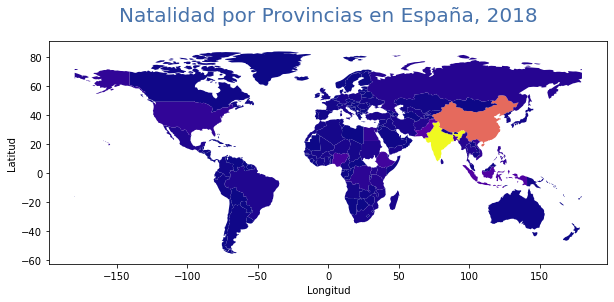

In [35]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
zet1.plot(column='2019', cmap='plasma', ax=ax, zorder=5)

<AxesSubplot:title={'center':'Natalidad por Provincias en España, 2018'}, xlabel='Longitud', ylabel='Latitud'>

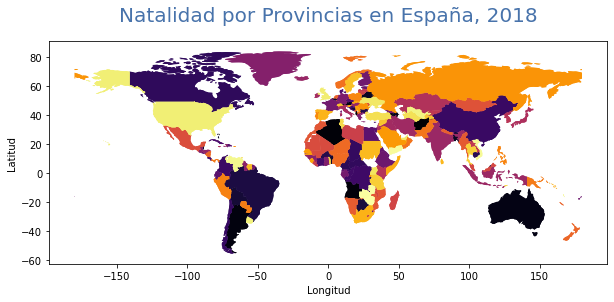

In [36]:
zet = GeoDataFrame(zet)
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
zet.plot(column='CountryName', cmap='inferno', ax=ax, zorder=5)

In [37]:
lista =zet['Region'].unique()
lista

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America'], dtype=object)

In [38]:
def region(x):
    zet2= zet1[zet1['Region']==x]
    f, ax = plt.subplots(1, figsize=(15, 6))
    ax = zet2['geometry'].plot(ax=ax,cmap='Blues',alpha=0.6,edgecolor='k',lw=2)
    lims = plt.axis('off')
    f.suptitle(x,fontsize=12)
    plt.show()

In [39]:
from ipywidgets import interact, Layout
import ipywidgets as widgets

In [40]:
interact(region, x = widgets.Dropdown(options=sorted(zet['Region'].unique()),description="Region"))

interactive(children=(Dropdown(description='Region', options=('East Asia & Pacific', 'Europe & Central Asia', …

<function __main__.region(x)>

In [41]:
def pais(x):
    zet2= zet1[zet1['CountryName']==x]
    f, ax = plt.subplots(1, figsize=(15, 6))
    ax = zet2['geometry'].plot(ax=ax,cmap='Blues',alpha=0.6,edgecolor='k',lw=2)
    lims = plt.axis('off')
    f.suptitle(x,fontsize=12)
    plt.show()
interact(pais, x = widgets.Dropdown(options=sorted(zet1['CountryName'].unique()),description="Pais"))

interactive(children=(Dropdown(description='Pais', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Ar…

<function __main__.pais(x)>

In [42]:
zet.to_excel(r'C:\Users\USUARIO\Downloads\zet.xlsx', index = False)

# Ejercicio 4
La base de datos aún conserva valores un poco difíciles de leer, remplace los valores de la columna 'Indicator code' por una descripción un poco más amena para el lector. 

In [43]:
Base = sub_tema_C_df
Base1 = sub_tema_C_df
BaseRural = sub_tema_C_df[sub_tema_C_df['IndicatorName'] == 'Rural population']
BaseUrbano = sub_tema_C_df[sub_tema_C_df['IndicatorName'] == 'Urban population']

In [44]:
def listadoDatos(DataFrame, columna_base, total_columnas):
    listado = list(DataFrame)
    i = columna_base
    p = 1
    datos = list()
    yy = list() #Listado de años
    zz = list()
    while i < total_columnas:
        year = listado[i]
        vc = list(DataFrame[listado[i]])
        z = p
        for j in vc:
            datos.append(j)
            yy.append(year)
            zz.append(z)
        i = i + 1
        p = p + 1
    return datos, yy, zz
    

In [45]:
pobUrbano, yUrbano, zUrbano = listadoDatos(BaseUrbano, 6, 66)
pobRural, yRural, zRural = listadoDatos(BaseRural, 6, 66)

In [46]:
defData = pd.DataFrame()
defData['Country Name'] = list(BaseRural['CountryName']) * 60
defData['Country Code'] = list(BaseRural['Country Code']) * 60
defData['Region'] = list(BaseRural['Region']) * 60
defData['Latest population census'] = list(BaseRural['Latest population census']) * 60
#defData['IndicatorCode'] = list(BaseRural['IndicatorCode'] == 'Total Population') * 60
defData['X_value'] = zUrbano
defData['Year'] = yUrbano
defData['Urban population'] = pobUrbano
defData['Rural polulation'] = pobRural
defData

,Country Name,Country Code,Region,Latest population census,X_value,Year,Urban population,Rural polulation
0,Afghanistan,AFG,South Asia,1979,1,1960,755836.0,8241137.0
1,Albania,ALB,Europe & Central Asia,2011,1,1960,493982.0,1114818.0
2,Algeria,DZA,Middle East & North Africa,2008,1,1960,3373754.0,7684109.0
3,American Samoa,ASM,East Asia & Pacific,2010,1,1960,13324.0,6799.0
4,Andorra,AND,Europe & Central Asia,2011. Population data compiled from administra...,1,1960,7839.0,5572.0
...,...,...,...,...,...,...,...,...
13015,Virgin Islands (U.S.),VIR,Latin America & Caribbean,2010,60,2019,102223.0,4446.0
13016,West Bank and Gaza,PSE,Middle East & North Africa,2017,60,2019,3581448.0,1103858.0
13017,"Yemen, Rep.",YEM,Middle East & North Africa,2004,60,2019,10869523.0,18292399.0
13018,Zambia,ZMB,Sub-Saharan Africa,2010,60,2019,7871713.0,9989317.0


In [47]:
Df_Final = pd.merge(defData, z, left_on='Country Code', right_on='adm0_a3')
Df_Final = Df_Final.drop(['adm0_a3'], axis=1)
Df_Final
#sub_tema_df = sub_tema_df.drop(['CountryCode'], axis=1)

,Country Name,Country Code,Region,Latest population census,X_value,Year,Urban population,Rural polulation,filename,Numero,geometry
0,Afghanistan,AFG,South Asia,1979,1,1960,755836.0,8241137.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,Afghanistan,AFG,South Asia,1979,2,1961,796272.0,8373138.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
2,Afghanistan,AFG,South Asia,1979,3,1962,839385.0,8512056.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
3,Afghanistan,AFG,South Asia,1979,4,1963,885228.0,8657977.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
4,Afghanistan,AFG,South Asia,1979,5,1964,934135.0,8810646.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
...,...,...,...,...,...,...,...,...,...,...,...
10015,Zimbabwe,ZWE,Sub-Saharan Africa,2012,56,2015,4473868.0,9340761.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10016,Zimbabwe,ZWE,Sub-Saharan Africa,2012,57,2016,4531255.0,9499135.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10017,Zimbabwe,ZWE,Sub-Saharan Africa,2012,58,2017,4589499.0,9647246.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10018,Zimbabwe,ZWE,Sub-Saharan Africa,2012,59,2018,4650663.0,9788355.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [48]:
Df_Final = GeoDataFrame(Df_Final)
Df_Final

,Country Name,Country Code,Region,Latest population census,X_value,Year,Urban population,Rural polulation,filename,Numero,geometry
0,Afghanistan,AFG,South Asia,1979,1,1960,755836.0,8241137.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,Afghanistan,AFG,South Asia,1979,2,1961,796272.0,8373138.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
2,Afghanistan,AFG,South Asia,1979,3,1962,839385.0,8512056.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
3,Afghanistan,AFG,South Asia,1979,4,1963,885228.0,8657977.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
4,Afghanistan,AFG,South Asia,1979,5,1964,934135.0,8810646.0,AFG.geojson,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
...,...,...,...,...,...,...,...,...,...,...,...
10015,Zimbabwe,ZWE,Sub-Saharan Africa,2012,56,2015,4473868.0,9340761.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10016,Zimbabwe,ZWE,Sub-Saharan Africa,2012,57,2016,4531255.0,9499135.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10017,Zimbabwe,ZWE,Sub-Saharan Africa,2012,58,2017,4589499.0,9647246.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
10018,Zimbabwe,ZWE,Sub-Saharan Africa,2012,59,2018,4650663.0,9788355.0,ZWE.geojson,1,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


<AxesSubplot:title={'center':'Regiones del mundo'}, xlabel='Longitud', ylabel='Latitud'>

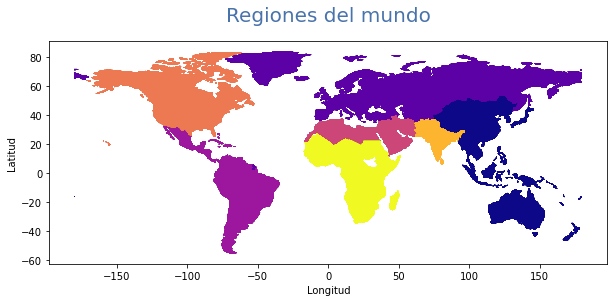

In [49]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Regiones del mundo', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
Df_Final.plot(column='Region', cmap='plasma', ax=ax, zorder=5)

In [50]:
Df_Final.to_excel(r'C:\Users\USUARIO\Downloads\Df_Final.xlsx', index = False)

# Ejercicio 5
Es aquí donde su creatividad será puesta a prueba, pues ya tiene una base de datos en buenas condiciones para representar gráficamente muchísima información, pero no se cohiba, si quiere puede agregar más columnas de los demás archivos para hacer más y graficos más específicos.

*Sugerencia:* Grafique la distribución de las variables obtenidas, el comparativo entre regiones, como también entre los países que más aportan, las diferencias entre los países con ingresos altos medios y bajos, no se le sugiere más porque usted debe ser el creativo.

Recuerde la información debe ser relevante, fácil de leer y puede emplear las diferentes librerías vistas hasta ahora para hacer de su datafolio el mejor.

# Observaciones:
El datafolio debe:
```
- Enfatizar la narración y visualización de datos sobre la explicación con mucho texto.
- Ser de fácil lectura para la audiencia  y debe dar a entender rápidamente la esencia del trabajo.
- Ser atractivo y accesible para audiencias 'no técnicas'.
```